In [ ]:
#Importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(color_codes=True)
sns.set_style("darkgrid")




In [4]:
#loading the dataset
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')


In [8]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [9]:
df = df.rename(columns=column_names)

In [10]:
#select a sample of the dataset
simple_linear_reg_df = df[["Relative_Compactness", 'Cooling_Load']].sample(15, random_state=2)

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

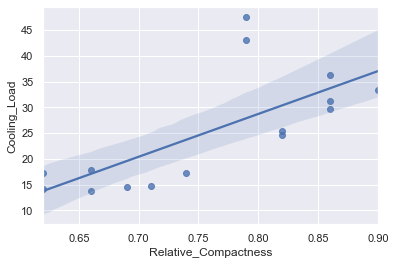

In [11]:
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)

In [12]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,NaN,NaN
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [13]:
df.shape

(768, 12)

In [28]:
df.dropna(axis=1,how="all",inplace=True)

In [ ]:
Measuring regression performance


In [29]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']


In [36]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)


In [37]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [38]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [39]:
#r2
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.893

In [40]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.823

In [41]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

In [ ]:
Penalization Methods

In [52]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df



In [43]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=0.001)

In [46]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [57]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights=pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Surface_Area,-3.458933e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,5.081177e-03,0.003369,0.000000
3,Glazing_Area_Distribution,3.077054e-02,0.029088,0.021431
4,Glazing_Area,2.125349e-01,0.212449,0.206132
5,Overall_Height,3.967285e-01,0.442467,0.463482
6,Wall_Area,2.017711e+12,0.103061,0.200087
7,Roof_Area,2.594200e+12,-0.163192,-0.000000


In [ ]:
LOADING DATA FOR THE QUIZ

In [63]:
#Importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(12,12))
sns.set(color_codes=True)
sns.set_style("darkgrid")


In [77]:
#loading the dataset
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [78]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [74]:
#renaming the columns
column_names = {'date': 'date',
                'Appliances': 'Appliances', 
                'lights': 'lights',
    'T1': 'Temperature_in_kitchen_area',
'RH_1': 'Humidity_in_kitchen_area',
'T2': 'Temperature_in_living_room_area',
'RH_2': 'Humidity_in_living_room_area',
'T3': 'Temperature_in_laundry_room_area',
'RH_3': 'Humidity_in_laundry_room_area', 
'T4': 'Temperature_in_office_room', 
'RH_4': 'Humidity_in_office_room',
'T5': 'Temperature_in_bathroom',
'RH_5': 'Humidity_in_bathroom',
'T6': 'Temperature_outside_the_building_north', 
'RH_6': 'Humidity_outside_the_building_north',
'T7': 'Temperature_in_ironing_room',
'RH_7': 'Humidity_in_ironing_room', 
'T8': 'Temperature_in_teenager_room_2', 
'RH_8': 'Humidity_in_teenager_room_2', 
'T9': 'Temperature_in_parents_room', 
'RH_9': 'Humidity_in parents_room' }
#rename columns
df = df.rename(columns = column_names)
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [75]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
#'date' column wasn't included in the summary statistics because it contains string data type.


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [91]:
df_energy.drop(['date','lights'], 1, inplace = True)

In [80]:
#checking the shape
df.shape 

(19735, 29)

In [81]:
#checking for Nan values
sum(df.isnull().sum())

0

In [82]:
df.dtypes #checking the data types of each column

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

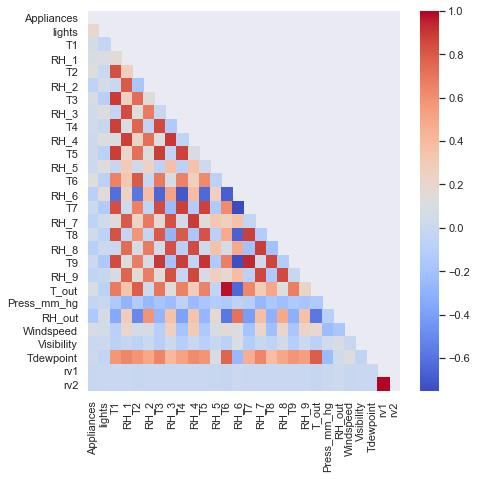

In [83]:
energy_data_corr_df = df.corr()

mask = np.triu(np.ones((28, 28))) #to mask out the upper triangular matrix of the heatmap because the lower triangular matrix alone contains all collinearity.

plt.figure(figsize=(7, 7)) 
sns.heatmap(energy_data_corr_df, mask=mask, xticklabels=True, yticklabels=True, cmap='coolwarm')
#xticklabels and yticklabels are set to True to display all columns in the heatmap

plt.show()


In [84]:
#it looks like rv1 and rv2 have the heighest collinearity.

In [85]:
#Importing important machine learning libraries
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

In [96]:
#normalize dataset and remove irrelevant columns for future use

scaler = MinMaxScaler()
df_energy_norm = pd.DataFrame(scaler.fit_transform(df_energy), columns = df_energy.columns)

df_energy_norm.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [111]:
X1 = df_energy_norm[['T2']]
y1 = df_energy_norm[['T6']]

In [112]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.3, random_state = 42)

In [113]:

lm2 = LinearRegression()

In [114]:
lm2.fit(x1_train,y1_train)
R_2 = lm2.score(x1_test,y1_test)
round(R_2,2)

0.64

In [115]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.05

In [116]:
X = df_energy_norm.drop(columns = ['Appliances'])
y = df_energy_norm['Appliances']

In [117]:
#split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
lm = LinearRegression()
#fit the model to the training dataset
lm.fit(x_train, y_train)
#obtain predictions
predicted_values = lm.predict(x_test)
#r_squared = lm.score(X,y)
r_squared1 = lm.score(x_test,y_test)
#print(r_squared)
print(r_squared1)

0.14890246319303535


In [119]:
#model evaluation
print(lm.intercept_)

0.1529029588225307


In [120]:
print(lm.coef_)

[-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


In [121]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T1,-0.003281
RH_1,0.553547
T2,-0.236178
RH_2,-0.456698
T3,0.290627
RH_3,0.096048
T4,0.028981
RH_4,0.026386
T5,-0.015657
RH_5,0.016006


In [122]:
#prediction
predicted_values = lm.predict(x_test)
predicted_values

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

Text(0, 0.5, 'predicted_value')

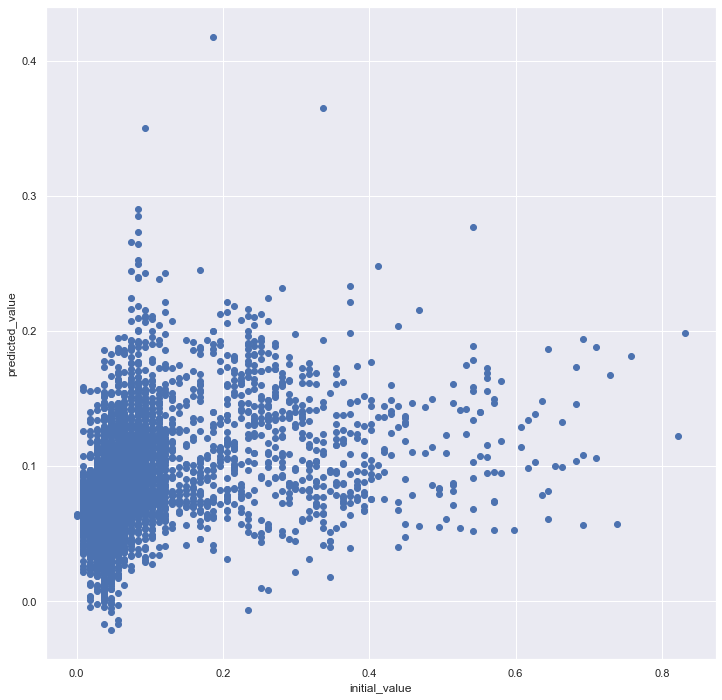

In [123]:
plt.scatter(y_test,predicted_values)
plt.xlabel('initial_value')
plt.ylabel('predicted_value')

In [124]:
from sklearn import metrics

In [125]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted_values))
print('MSE:', metrics.mean_squared_error(y_test, predicted_values))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

MAE: 0.050133623977429535
MSE: 0.007658778867195367
RMSE: 0.0875144494766171


In [126]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.149

In [127]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

45.348

In [128]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [129]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [130]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [131]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [132]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on = 'Features')
final_weights = pd.merge(final_weights, lasso_weights_df)
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.401134,-0.000000
1,T_out,-0.321860,-0.250765,0.000000
2,T2,-0.236178,-0.193880,0.000000
3,T9,-0.189941,-0.188584,-0.000000
4,RH_8,-0.157595,-0.156596,-0.000110
5,RH_out,-0.077671,-0.050541,-0.049557
6,RH_7,-0.044614,-0.046291,-0.000000
7,RH_9,-0.039800,-0.041701,-0.000000
8,T5,-0.015657,-0.020727,-0.000000
9,T1,-0.003281,-0.021549,0.000000


In [133]:
#Question 12
lm2.fit(x1_train,y1_train)
R_2 = lm2.score(x1_test,y1_test)
round(R_2,2) 

0.64

In [134]:
#Question 13
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.05

In [135]:
#Question 15
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

In [136]:
#Question 16
#coefficient of determination
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

In [137]:
#Question 17
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df.sort_values(by= 'Coefficient',ascending = True))

             Coefficient
RH_2           -0.456698
T_out          -0.321860
T2             -0.236178
T9             -0.189941
RH_8           -0.157595
RH_out         -0.077671
RH_7           -0.044614
RH_9           -0.039800
T5             -0.015657
T1             -0.003281
rv2             0.000770
rv1             0.000770
Press_mm_hg     0.006839
T7              0.010319
Visibility      0.012307
RH_5            0.016006
RH_4            0.026386
T4              0.028981
Windspeed       0.029183
RH_6            0.038049
RH_3            0.096048
T8              0.101995
Tdewpoint       0.117758
T6              0.236425
T3              0.290627
RH_1            0.553547


In [138]:
#Question 18
from sklearn.linear_model import Ridge
ridge_reg4 = Ridge(alpha=0.4)
ridge_reg4.fit(x_train, y_train)
predicted_value1 = ridge_reg4.predict(x_test)

In [139]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_value1))
round(rmse, 3)

0.088

In [140]:
#Question 19
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
lasso_weights = lasso_reg.coef_
lasso_weights

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])

In [141]:
#lasso_df[lasso_df['Coefficient'] < 0 ].count()
lasso_df = pd.DataFrame(lasso_weights,X.columns,columns=['Coefficient'])
lasso_df[lasso_df['Coefficient'] > 0 ].count()

Coefficient    2
dtype: int64

In [145]:
lasso_df[lasso_df['Coefficient'] < 0 ].count()

Coefficient    2
dtype: int64

In [ ]:
answer = 4

In [146]:
#Question 20
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
lasso_predict = lasso_reg.predict(x_test)

In [147]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, lasso_predict))
round(rmse, 3)

0.094